## Literacy rate vs Fertility rate

In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import timeit
from scipy import stats

pd.set_option('display.max_rows', 60000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
sns.set_style('darkgrid')

filename_1 = 'datasets/literacy-rate-annual/literacy-rate-annual.csv'
filename_2 = 'datasets/births-and-fertility-annual/total-fertility-rate-and-reproduction-rate.csv'

df1 = pd.read_csv(filename_1)
df2 = pd.read_csv(filename_2)

df2 = df2[df2['level_1'] == 'Total Fertility Rate'].copy().reset_index(drop=True)

df1.columns = ['year','literacy_rate_1','literacy_rate']
df2.columns = ['year','fertility_rate_1','fertility_rate']

df = pd.merge(df1,df2,how='inner', on = 'year', suffixes=('_lit', '_fert'))

## EDA 

In [3]:
df.info() #summary of the combine dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              59 non-null     int64  
 1   literacy_rate_1   59 non-null     object 
 2   literacy_rate     59 non-null     float64
 3   fertility_rate_1  59 non-null     object 
 4   fertility_rate    59 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ KB


In [4]:
df.shape #this is the shape of the dataset 

(59, 5)

In [9]:
df.columns #these are the columns in the dataset

Index(['year', 'literacy_rate_1', 'literacy_rate', 'fertility_rate_1',
       'fertility_rate'],
      dtype='object')

In [12]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58],
           dtype='int64')

In [5]:
df.isnull().sum() #ensure no nans in the dataset

year                0
literacy_rate_1     0
literacy_rate       0
fertility_rate_1    0
fertility_rate      0
dtype: int64

In [6]:
df.describe() #a descriptive statistical summary of the dataset

,year,literacy_rate,fertility_rate
count,59.00,59.00,59.00
mean,"1,989.00",83.36,2.17
std,17.18,13.19,1.25
min,"1,960.00",52.60,1.14
25%,"1,974.50",75.40,1.29
50%,"1,989.00",88.40,1.71
75%,"2,003.50",93.65,2.23
max,"2,018.00",97.30,5.76


## Function to reproduce the Literacy rate vs Fertility rate chart

In [7]:
def chart_2 ( y1=1960, y2=2018):
    range_of_years  = [i for i in range(y1, y2 + 1)]
    selected_years = df[df['year'].isin(range_of_years)]
    g = sns.jointplot(x = "literacy_rate", y = "fertility_rate", 
              kind = "reg", data = selected_years,
              height=8,   #Default: 6
              space=0.2,  #Default: 0.2
              ratio=7,
              marginal_kws=dict(bins=25, fill=False))
    
    #inserting the r score at the top right corner of the plot
    r, p = stats.pearsonr(selected_years["literacy_rate"],selected_years["fertility_rate"])
    phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
    g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
    
    g.fig.suptitle("Literacy Rate vs Fertility Rate")
    g.fig.tight_layout()
    plt.show()

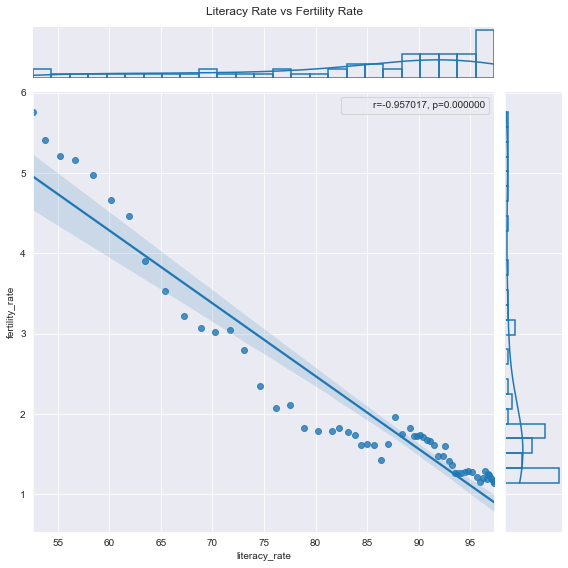

In [8]:
chart_2()